###  The data
156  soil images of soils are divided into 5 classes of soil type 
### The goal
classify the soils into 5 classe ('Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil')

# raed all image from directory

Found 156 files belonging to 5 classes.
['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


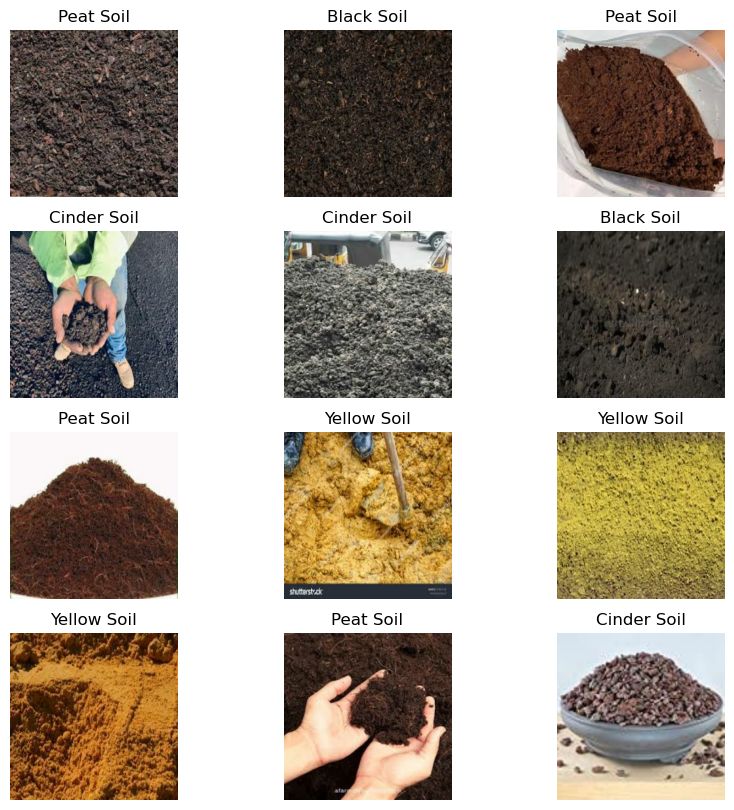

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
image_soil=tf.keras.utils.image_dataset_from_directory(
    Soil_types_directory,
    labels='inferred' ,
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    image_size=(256, 256))
   

class_names =image_soil.class_names
print(class_names)


### show sum image ###
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in image_soil.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Data preparation for models

In [3]:
##### soil image to df  #####


Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

classes_directory=os.path.join(Soil_types_directory,classes [0]) 
df_image= pd.DataFrame()
dict_images={}
for  classes in classes:
    images ={}
    print(classes)
    classes_directory=os.path.join(Soil_types_directory,classes) 
    for img_name in os.listdir(classes_directory):
        image_path=os.path.join(classes_directory,img_name)
        img_name=img_name[0:-4]
        img = tf.keras.utils.load_img(image_path, target_size=(64,64))
        images.update({ img_name:img})
        img_arr = tf.keras.utils.img_to_array(img)
        bands_list=[]
        for i in range(3):
            band= img_arr[:,:,i]
            n_pixels=band.size
            band_2d = band.reshape(n_pixels, 1)
            bands_list.append(band_2d)
      
        arr_columns = np.concatenate(bands_list, axis=1)
    
        # Create the pandas DataFrame
        # Get the pixel coordinates
        x_coords, y_coords = np.meshgrid(np.arange(band.shape[1]), np.arange(band.shape[0]))
        x_coords = x_coords.flatten()
        y_coords = y_coords.flatten()
    

        df = pd.DataFrame( arr_columns, columns=['r','g','b'])
       
        df=df.assign(classes=classes,image=img_name)
        df['x_int'] = x_coords
        df['y_int'] = y_coords
        df_image=pd.concat([df_image,df])
    dict_images.update({classes:images})  
    
df_image=df_image.assign(image_classes=df_image.classes+df_image.image)
print(df_image.shape)
df_image.to_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
 

Black Soil
Cinder Soil
Laterite Soil
Peat Soil
Yellow Soil
(638976, 8)


In [4]:
###   Selecting pixels of a specific image ####

Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
image_list= ['Black Soil2','Cinder Soil2', 'Laterite Soil2','Peat Soil2','Yellow Soil2']
      
df_image=data_image.loc[data_image['image_classes'].isin(image_list),:]
print(df_image.shape)
df_image.to_csv(os.path.join(Soil_types_directory,'Selecting_image_64.csv'))

(20480, 9)


In [6]:
#### mean RGB by image ####
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
df_image_mean_pxsele=data_image.groupby(by=['image_classes','classes'])[['r','g','b']].mean().reset_index()
print(df_image_mean_pxsele.shape)
df_image_mean_pxsele.to_csv(os.path.join(Soil_types_directory,'all_image_mean.csv'))

(156, 5)


# visualize and summary of data

In [10]:
import plotly.express as px 
import ipywidgets as widgets
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
data_image_mean=pd.read_csv(os.path.join(Soil_types_directory,'all_image_mean.csv'))
data_image_Selecting=pd.read_csv(os.path.join(Soil_types_directory,'Selecting_image_64.csv'))

In [12]:
a=data_image.groupby(by=['classes'])[['r','g','b']].mean()
print(a)
print('#########################################################')
a=data_image_mean.groupby(by=['classes'])[['r','g','b']].mean()
print(a)
print('#########################################################')
a=data_image_Selecting.groupby(by=['classes'])[['r','g','b']].mean()
print(a)
print('#########################################################')

##### var plot ####



                        r           g           b
classes                                          
Black Soil      60.382780   50.683680   46.273193
Cinder Soil    119.705949  105.753394  101.653955
Laterite Soil  163.427360   94.759798   66.346053
Peat Soil      116.877230   93.927116   82.361548
Yellow Soil    180.018471  132.354214   65.482599
#########################################################
                        r           g           b
classes                                          
Black Soil      60.382780   50.683680   46.273193
Cinder Soil    119.705949  105.753394  101.653955
Laterite Soil  163.427360   94.759798   66.346053
Peat Soil      116.877230   93.927116   82.361548
Yellow Soil    180.018471  132.354214   65.482599
#########################################################
                        r           g          b
classes                                         
Black Soil      45.206055   44.280518  42.083740
Cinder Soil    117.452148   97.146729

In [11]:
#### box plot  ####


@widgets.interact
def plot_histogram(col=['r','g','b']):
    data =data_image[[col,"classes"]]
    fig = px.box(data,x="classes", y=col)
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    return  fig


@widgets.interact
def plot_histogram(col=['r','g','b']):
    data =data_image_mean[[col,"classes"]]
    fig = px.box(data,x="classes", y=col)
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    return  fig


@widgets.interact
def plot_histogram(col=['r','g','b']):
    data =data_image_Selecting[[col,"classes"]]
    fig = px.box(data,x="classes", y=col)
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    return  fig

interactive(children=(Dropdown(description='col', options=('r', 'g', 'b'), value='r'), Output()), _dom_classes…

interactive(children=(Dropdown(description='col', options=('r', 'g', 'b'), value='r'), Output()), _dom_classes…

interactive(children=(Dropdown(description='col', options=('r', 'g', 'b'), value='r'), Output()), _dom_classes…

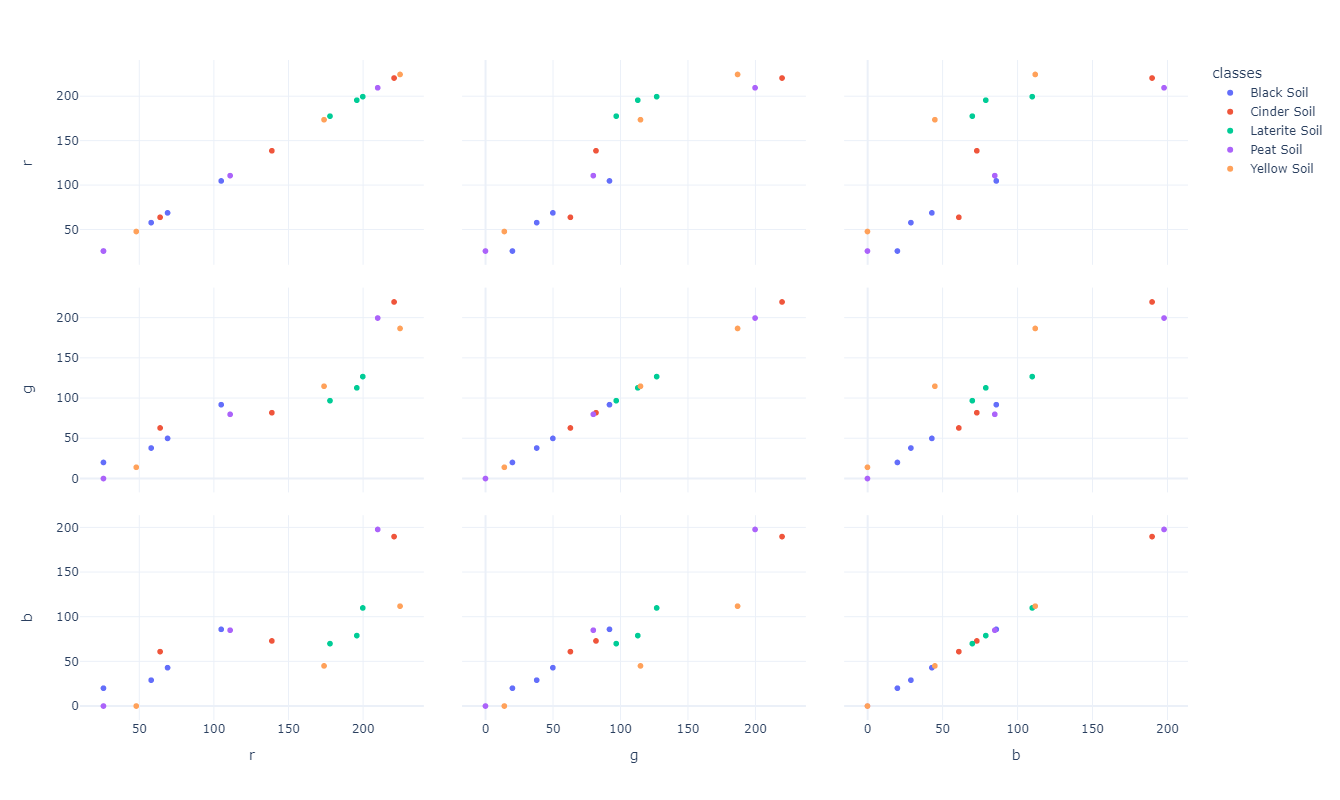

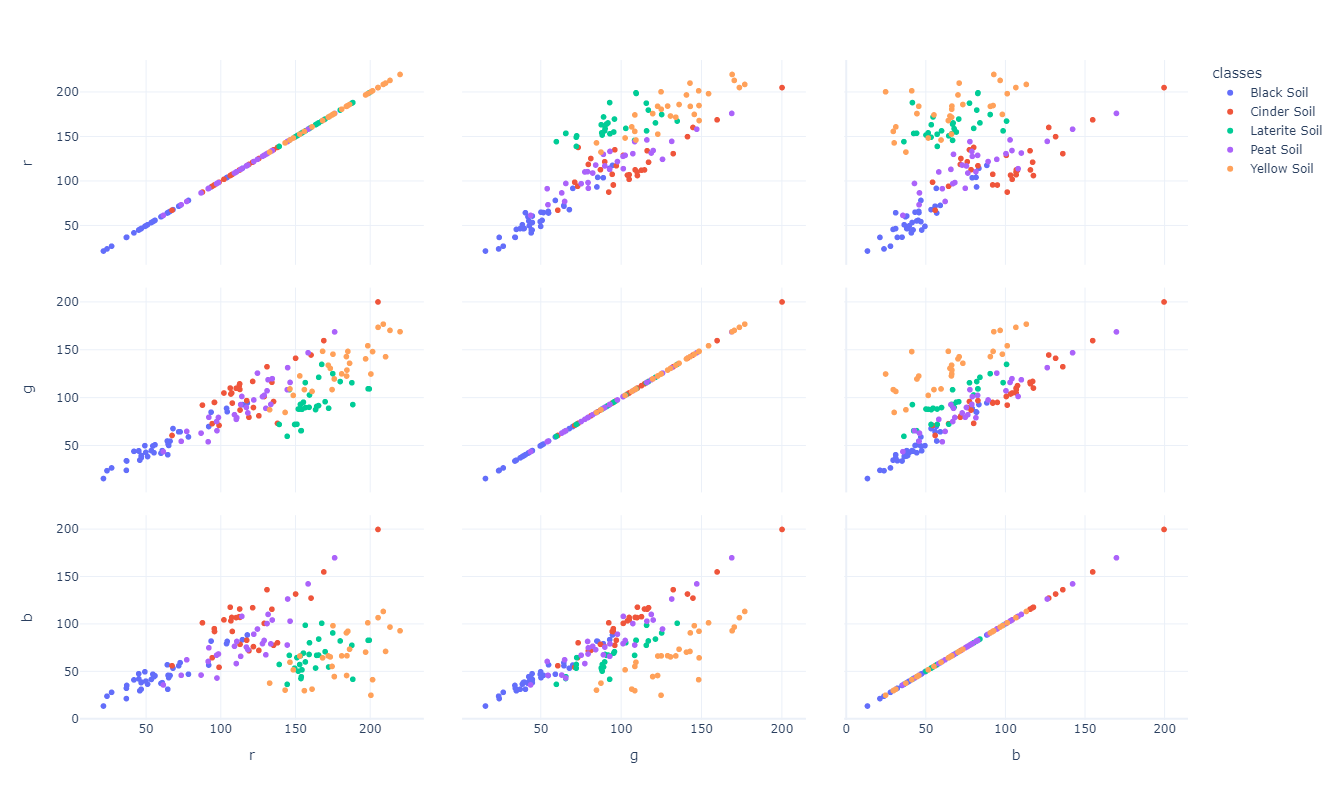

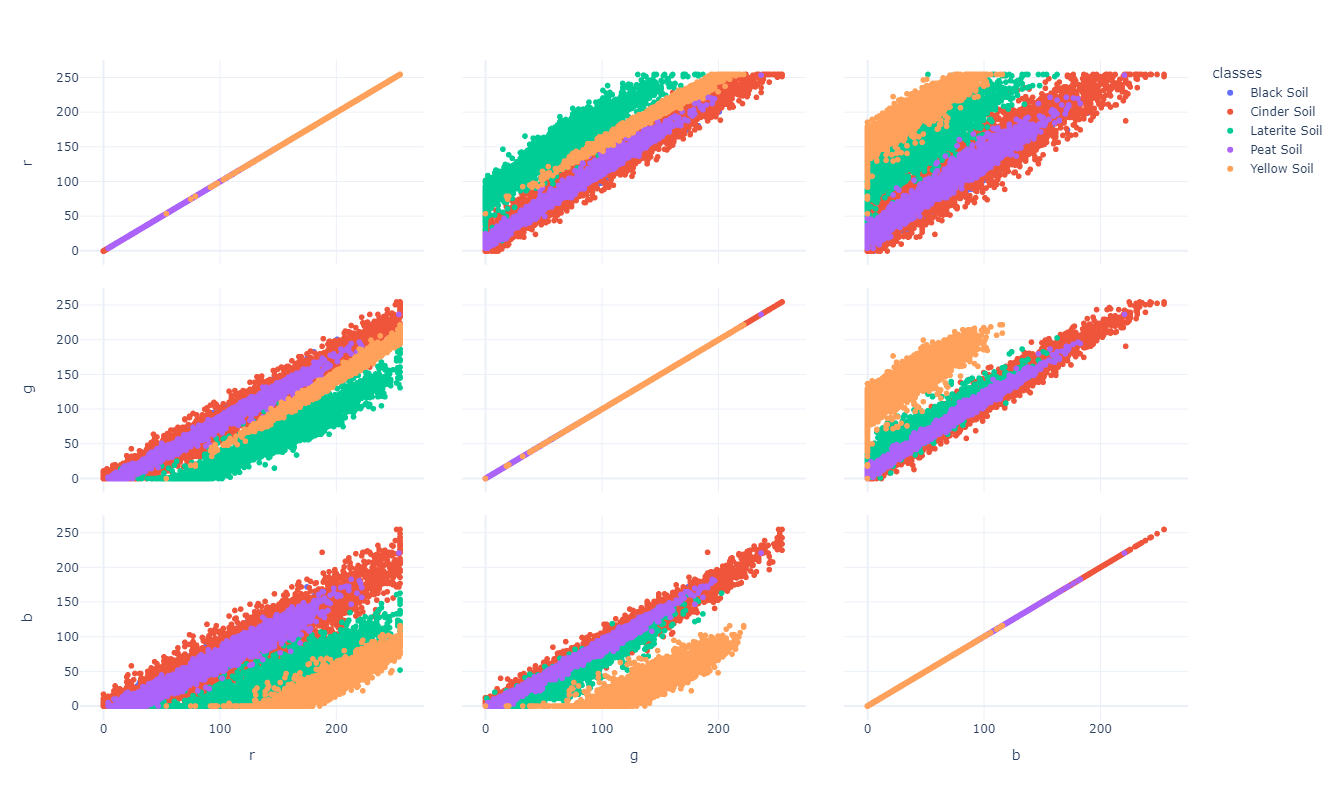

In [15]:
data_image=data_image.groupby(by=['classes']).sample(frac=0.005)
fig = px.scatter_matrix(data_image, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800)
fig.show()

fig = px.scatter_matrix(data_image_mean, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800)
fig.show()
fig = px.scatter_matrix(data_image_Selecting, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800)
fig.show()





